# Data generation

In [1]:
!pip install fplanck

The Fokker-Planck Equation is a partial differential equation that describes the time evolution of the probability density function of the velocity of a particle under the influence of forces. 


The Fokker–Planck equation for the probability density $ p(x,t)$ of the random variable $ X_{t}$ is
$$
{\frac {\partial }{\partial t}}p(x,t)=-{\frac {\partial }{\partial x}}\left[J(x,t)\right]$$

where $J$ is probability current flux
$$
{\frac {\partial }{\partial t}}p(x,t)=-{\frac {\partial }{\partial x}}\left[\mu (x,t)p(x,t)\right]+{\frac{1}{2}\frac {\partial ^{2}}{\partial x^{2}}}\left[D(x,t)p(x,t)\right]$$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from fplanck import fokker_planck, boundary, gaussian_pdf, harmonic_potential
from mpl_toolkits.mplot3d import Axes3D
from numpy import asarray
from numpy import save
from numpy import load
from numpy import asarray
from scipy.io import savemat
import scipy

In [3]:
nm = 1e-9

In [4]:
def F(x, y):
    rad = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    L = 200*nm

    Fphi = 1e-12*rad/L*np.exp(-rad/L)
    Frad = 1e-12*(1 - rad/L)*np.exp(-rad/L)

    Fx = -np.sin(phi)*Fphi + np.cos(phi)*Frad
    Fy = np.cos(phi)*Fphi + np.sin(phi)*Frad
    return np.array([Fx, Fy])

In [5]:
def generate_data(width,x_c,y_c,Nsteps):
      nm = 1e-9
      viscosity = 8e-4
      radius = 50*nm
      drag = 6*np.pi*viscosity*radius

      U = harmonic_potential((0,0), 1e-6)
      #F = lambda x: np.ones_like(x)
      sim = fokker_planck(temperature=300, drag=drag, extent=[640*nm, 640*nm],
                  resolution=10*nm, boundary=boundary.reflecting, potential=U, force=F)

      ### time-evolved solution


      pdf = gaussian_pdf(center=(x_c*nm, y_c*nm), width=width*nm)
      #pdf = gaussian_pdf(center=(-150*nm, -150*nm), width=30*nm)
      p0 = pdf(*sim.grid)

      
      time, Pt = sim.propagate_interval(pdf, 2e-3, Nsteps=Nsteps)

      ### animation
      # fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), constrained_layout=True)

      # surf = ax.plot_surface(*sim.grid/nm, p0, cmap='viridis')

      # ax.set_zlim([0,np.max(Pt)/3])
      # ax.autoscale(False)

      # # def update(i):
      # #     global surf
      # #     surf.remove()
      # #     surf = ax.plot_surface(*sim.grid/nm, Pt[i], cmap='viridis')

      # #     return [surf]

      # anim = FuncAnimation(fig, update, frames=range(Nsteps), interval=30)
      # ax.set(xlabel='x (nm)', ylabel='y (nm)', zlabel='normalized PDF')

      # plt.show()
      return p0,Pt

In [6]:
def save_data(p0,Pt,ind,Nsteps):
  set_p=Pt.T
  samples_n=Nsteps//50
  new_set=np.zeros((samples_n,64,64,50))
  for i in range(samples_n):
    new_set[i]=set_p[:,:,i*50:i*50+50]
  # define data
  new_set=np.float32(new_set)
  data = asarray(new_set)
  # save to npy file
  title='output_2d_'+str(ind).zfill(3)
  print(title)
  save(title, data)

In [7]:
def save_data_mat(n,Nsteps):
  for j in range(n):
    [width]= np.random.randint(10, 40, size = 1)
    [x_c,y_c]= np.random.randint(-320 + width, 320-width, size = 2)
    width,x_c,y_c
    p0,Pt=generate_data(width,x_c,y_c,Nsteps)
    set_p=Pt.T
    for i in range(Nsteps): 
      title='sample_'+str(j)+'_output_2d_'+str(i).zfill(3)+'.mat'
      output=set_p[:,:,i]
      input=p0
      savemat(title, {"output":output},{"input":input})

    if j%10==1:
      print(title)
      

  

## **Save as npy(n=number of samples,Nsteps - default is 50(40-training, 10 testing))** - one big tensor

In [8]:
def save_data_npy(n,Nsteps=50):
  new_set=np.zeros((n,64,64,50))
  new_set_input=np.zeros((n,64,64))
  for i in range(n):
    [width]= np.random.randint(10, 40, size = 1)
    [x_c,y_c]= np.random.randint(-320 + width, 320-width, size = 2)
    width,x_c,y_c
    p0,Pt=generate_data(width,x_c,y_c,Nsteps)
    set_p=Pt.T
    samples_n=Nsteps//50
    if i%10==1:
      print(i)
    new_set[i]=set_p
    new_set_input[i]=p0
    # define data
  new_set=np.float32(new_set)
  new_set_input=np.float32(new_set_input)
  data = asarray(new_set)
  data_input = asarray(new_set_input)
  # save to npy file
  title='output_2d_'+str(n)+'_tensor'
  title_input='input_2d_'+str(n)+'_tensor'
  print(title,title_input)
  save(title, data)
  save(title_input, data_input)

In [9]:
save_data_npy(1,Nsteps=50)

output_2d_1_tensor input_2d_1_tensor


In [10]:
arr=np.load('output_2d_1_tensor.npy')

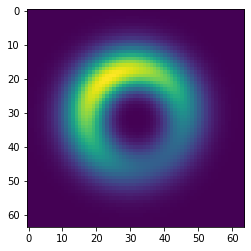

In [11]:
plt.imshow(arr[0,:,:,49])

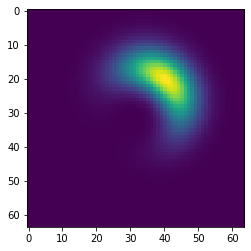

In [12]:
plt.imshow(arr[0,:,:,8])

## Save as **mat**

In [13]:
save_data_mat(1,50)